# **Library**

In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

import plotly.express as px
from scipy.stats import skew, kurtosis
import plotly.figure_factory as ff

from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeRegressor

# **Data Understanding**

## **Data Exploration**

In [124]:
# Load the dataset
file_path = '/content/Expanded_data_with_more_features.csv'
data = pd.read_csv(file_path)

df=pd.DataFrame(data)
# Display the first few rows, summary statistics, and information about the dataset
df.head()

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


In [125]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


In [126]:
df.shape

(30641, 15)

In [127]:
df.describe()

,Unnamed: 0,NrSiblings,MathScore,ReadingScore,WritingScore
count,30641.000000,29069.000000,30641.000000,30641.000000,30641.000000
mean,499.556607,2.145894,66.558402,69.377533,68.418622
std,288.747894,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,0.000000,10.000000,4.000000
25%,249.000000,1.000000,56.000000,59.000000,58.000000
50%,500.000000,2.000000,67.000000,70.000000,69.000000
75%,750.000000,3.000000,78.000000,80.000000,79.000000
max,999.000000,7.000000,100.000000,100.000000,100.000000


In [128]:
df.dtypes

,0
Unnamed: 0,int64
Gender,object
EthnicGroup,object
ParentEduc,object
LunchType,object
TestPrep,object
ParentMaritalStatus,object
PracticeSport,object
IsFirstChild,object
NrSiblings,float64


In [129]:
# Check for null values in the dataset
df.isnull().sum()

,0
Unnamed: 0,0
Gender,0
EthnicGroup,1840
ParentEduc,1845
LunchType,0
TestPrep,1830
ParentMaritalStatus,1190
PracticeSport,631
IsFirstChild,904
NrSiblings,1572


# **Data Preprocessing**

In [130]:
# Removing unwanted columns
df = df.drop(['Unnamed: 0'],axis=1)

In [131]:
df.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


In [132]:
df.dtypes

,0
Gender,object
EthnicGroup,object
ParentEduc,object
LunchType,object
TestPrep,object
ParentMaritalStatus,object
PracticeSport,object
IsFirstChild,object
NrSiblings,float64
TransportMeans,object


In [133]:
df.isnull().sum()

,0
Gender,0
EthnicGroup,1840
ParentEduc,1845
LunchType,0
TestPrep,1830
ParentMaritalStatus,1190
PracticeSport,631
IsFirstChild,904
NrSiblings,1572
TransportMeans,3134


## **Imputation**

### **Ethnic Group**

In [134]:
# Null Values
df["EthnicGroup"].isnull().sum()

1840

In [135]:
# Unique values
df['EthnicGroup'].unique()

array([nan, 'group C', 'group B', 'group A', 'group D', 'group E'],
      dtype=object)

In [136]:
mode_value = df['EthnicGroup'].mode()[0]
mode_value

'group C'

In [137]:
#replace null values with mode
df["EthnicGroup"].fillna(mode_value, inplace=True)
df["EthnicGroup"].isnull().sum()

<ipython-input-137-1c2795e9fdbf>:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





0

In [138]:
df['EthnicGroup']

,EthnicGroup
0,group C
1,group C
2,group B
3,group A
4,group C
...,...
30636,group D
30637,group E
30638,group C
30639,group D


### **Parent Education**

In [139]:
# Null Values
df["ParentEduc"].isnull().sum()

1845

In [140]:
# Unique values
df['ParentEduc'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school', nan],
      dtype=object)

In [141]:
#Get mode value
mode_value = df['ParentEduc'].mode()[0]
print(mode_value)

some college


In [142]:
#replace null values with mode
df["ParentEduc"].fillna(mode_value, inplace=True)
df["ParentEduc"].isnull().sum()

<ipython-input-142-fed1d97e3c27>:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





0

In [143]:
df['ParentEduc']

,ParentEduc
0,bachelor's degree
1,some college
2,master's degree
3,associate's degree
4,some college
...,...
30636,high school
30637,high school
30638,high school
30639,associate's degree


### **Lunch Type**

In [144]:
# Null Values
df["LunchType"].isnull().sum()

0

In [145]:
df["LunchType"].unique()

array(['standard', 'free/reduced'], dtype=object)

In [146]:
df['LunchType'] = df['LunchType'].replace('free/reduced', 'free or reduced')

In [147]:
df['LunchType']

,LunchType
0,standard
1,standard
2,standard
3,free or reduced
4,standard
...,...
30636,standard
30637,standard
30638,free or reduced
30639,standard


### **Test Preperation**

In [148]:
# Null Values
df["TestPrep"].isnull().sum()

1830

In [149]:
# Unique values
df['TestPrep'].unique()

array(['none', nan, 'completed'], dtype=object)

In [150]:
# Get mode value
mode_value = df['TestPrep'].mode()[0]
print(mode_value)


none


In [151]:
#replace null values with mode
df["TestPrep"].fillna(mode_value, inplace=True)
df["TestPrep"].isnull().sum()

<ipython-input-151-463591b8423a>:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





0

In [152]:
df['TestPrep'].unique()

array(['none', 'completed'], dtype=object)

In [153]:
df["TestPrep"]

,TestPrep
0,none
1,none
2,none
3,none
4,none
...,...
30636,none
30637,none
30638,completed
30639,completed


In [154]:
df["TestPrep"].isnull().sum()

0

### **Parent Marital Status**

In [155]:
#check the Null Value
df["ParentMaritalStatus"].isnull().sum()

1190

In [156]:
# Unique values
df['ParentMaritalStatus'].unique()

array(['married', 'single', 'widowed', nan, 'divorced'], dtype=object)

In [157]:
#find mode value
mode_value=df['ParentMaritalStatus'].mode()[0]
print(mode_value)

married


In [158]:
#Replace the Null Value with Mode
df['ParentMaritalStatus'].fillna(mode_value, inplace=True)
df['ParentMaritalStatus'].isnull().sum()

<ipython-input-158-2a75770c39dc>:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





0

In [159]:
df['ParentMaritalStatus']

,ParentMaritalStatus
0,married
1,married
2,single
3,married
4,married
...,...
30636,single
30637,single
30638,married
30639,married


### **Practice Sport**

In [160]:
#check the null Value
df['PracticeSport'].isnull().sum()

631

In [161]:
# Unique values
df['PracticeSport'].unique()

array(['regularly', 'sometimes', 'never', nan], dtype=object)

In [162]:
#Find Mode value
mode_value=df['PracticeSport'].mode()[0]
print(mode_value)

sometimes


In [163]:
#Replace the Null value with mode
df['PracticeSport'].fillna(mode_value, inplace = True)
df['PracticeSport'].isnull().sum()

<ipython-input-163-d14f64ac640a>:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





0

In [164]:
df['PracticeSport']

,PracticeSport
0,regularly
1,sometimes
2,sometimes
3,never
4,sometimes
...,...
30636,sometimes
30637,regularly
30638,sometimes
30639,regularly


### **Is First Child**

In [165]:
#finding missing value
df['IsFirstChild'].isnull().sum()

904

In [166]:
# Unique values
df['IsFirstChild'].unique()

array(['yes', 'no', nan], dtype=object)

In [167]:
#get the mode value
mode_value=df['IsFirstChild'].mode()[0]
print(mode_value)

yes


In [168]:
#relace the Null value with Mode
df['IsFirstChild'].fillna(mode_value, inplace=True)
df['IsFirstChild'].isnull().sum()

<ipython-input-168-f4ac24e1029f>:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





0

In [169]:
df['IsFirstChild']

,IsFirstChild
0,yes
1,yes
2,yes
3,no
4,yes
...,...
30636,no
30637,no
30638,no
30639,no


### **NrSiblings**

In [170]:
# check null values
df["NrSiblings"].isnull().sum()

1572

In [171]:
# Unique values
df['NrSiblings'].unique()

array([ 3.,  0.,  4.,  1., nan,  2.,  5.,  7.,  6.])

In [172]:
# mean
mean = round((df)["NrSiblings"].mean(),0)
mean

2.0

In [173]:
# Median
median = round((df)["NrSiblings"].median(),0)
median

2.0

In [174]:
#replace null values with mean
df["NrSiblings"].fillna(mean, inplace=True)
df["NrSiblings"].isnull().sum()

<ipython-input-174-83ecb4661f7b>:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





0

In [175]:
df['NrSiblings'].unique()

array([3., 0., 4., 1., 2., 5., 7., 6.])

In [176]:
df['NrSiblings'] = df['NrSiblings'].replace('.', '')

In [177]:
# Truncate the values by flooring
df['NrSiblings']=np.int64(pd.to_numeric(df['NrSiblings']))


In [178]:
df['NrSiblings']

,NrSiblings
0,3
1,0
2,4
3,1
4,0
...,...
30636,2
30637,1
30638,1
30639,3


In [179]:
df.dtypes

,0
Gender,object
EthnicGroup,object
ParentEduc,object
LunchType,object
TestPrep,object
ParentMaritalStatus,object
PracticeSport,object
IsFirstChild,object
NrSiblings,int64
TransportMeans,object


In [180]:
df.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,group C,bachelor's degree,standard,none,married,regularly,yes,3,school_bus,< 5,71,71,74
1,female,group C,some college,standard,none,married,sometimes,yes,0,NaN,5 - 10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free or reduced,none,married,never,no,1,NaN,5 - 10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0,school_bus,5 - 10,76,78,75


### **TransportMeans**

In [181]:
#finding missing value
df['TransportMeans'].isnull().sum()

3134

In [182]:
# Unique values
df['TransportMeans'].unique()

array(['school_bus', nan, 'private'], dtype=object)

In [183]:
#get the mode value
mode_value=df['TransportMeans'].mode()[0]
print(mode_value)

school_bus


In [184]:
#relace the Null value with Mode
df['TransportMeans'].fillna(mode_value, inplace=True)
df['TransportMeans'].isnull().sum()

<ipython-input-184-e71a64eff3ee>:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





0

In [185]:
df['TransportMeans'] = df['TransportMeans'].replace('school_bus', 'school bus')

In [186]:
df['TransportMeans'].unique()

array(['school bus', 'private'], dtype=object)

**bold text**## **Weakly Study Hours**

In [187]:
df.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,group C,bachelor's degree,standard,none,married,regularly,yes,3,school bus,< 5,71,71,74
1,female,group C,some college,standard,none,married,sometimes,yes,0,school bus,5 - 10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4,school bus,< 5,87,93,91
3,male,group A,associate's degree,free or reduced,none,married,never,no,1,school bus,5 - 10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0,school bus,5 - 10,76,78,75


In [188]:
#finding missing value
df['WklyStudyHours'].isnull().sum()

955

In [189]:
df['WklyStudyHours'].unique()

array(['< 5', '5 - 10', '> 10', nan], dtype=object)

In [190]:
#get the mode value
mode_value=df['WklyStudyHours'].mode()[0]
print(mode_value)

5 - 10


In [191]:
#relace the Null value with Mode
df['WklyStudyHours'].fillna(mode_value, inplace=True)
df['WklyStudyHours'].isnull().sum()

<ipython-input-191-12060c7c2aa7>:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





0

In [192]:
df['WklyStudyHours'].unique()

array(['< 5', '5 - 10', '> 10'], dtype=object)

In [193]:
df.isnull().sum()

,0
Gender,0
EthnicGroup,0
ParentEduc,0
LunchType,0
TestPrep,0
ParentMaritalStatus,0
PracticeSport,0
IsFirstChild,0
NrSiblings,0
TransportMeans,0


# **Data Representation**

In [194]:
df2 = df[['TestPrep', 'TransportMeans','WklyStudyHours','MathScore','ReadingScore','WritingScore' ]]
df2

,TestPrep,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,none,school bus,< 5,71,71,74
1,none,school bus,5 - 10,69,90,88
2,none,school bus,< 5,87,93,91
3,none,school bus,5 - 10,45,56,42
4,none,school bus,5 - 10,76,78,75
...,...,...,...,...,...,...
30636,none,school bus,5 - 10,59,61,65
30637,none,private,5 - 10,58,53,51
30638,completed,private,5 - 10,61,70,67
30639,completed,school bus,5 - 10,82,90,93


In [195]:
df2['WklyStudyHours'] = df2['WklyStudyHours'].replace({ '< 5': 0,  '5 - 10': 5,  '> 10': 11  })

<ipython-input-195-f8abceb8dc4a>:1: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [196]:
df2.dtypes

,0
TestPrep,object
TransportMeans,object
WklyStudyHours,int64
MathScore,int64
ReadingScore,int64
WritingScore,int64


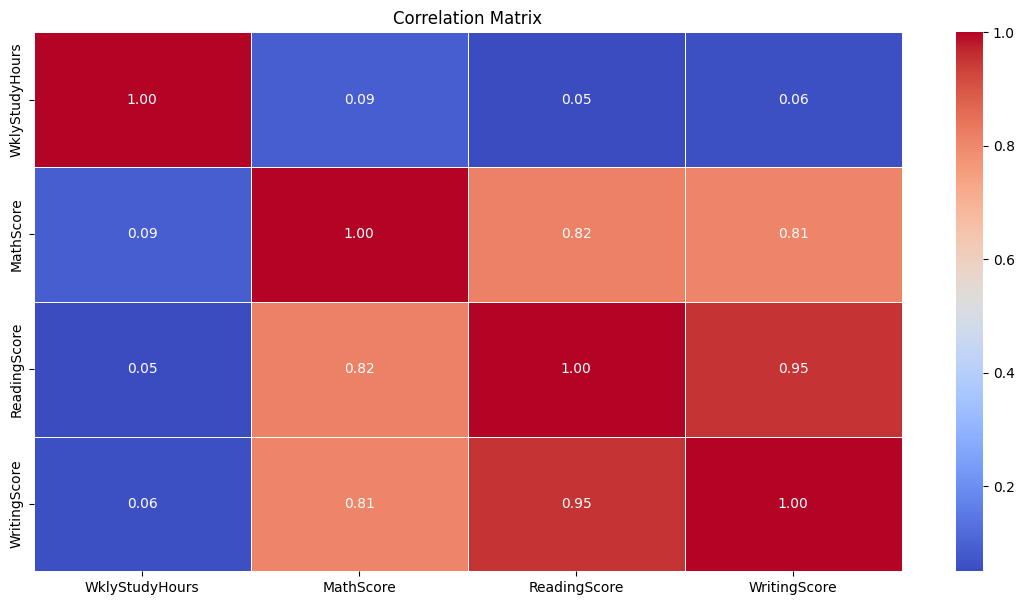

In [197]:
df3 = df2.select_dtypes(include=['int64'])
df3

correlation_matrix = df3.corr()
correlation_matrix
plt.figure(figsize=(14,7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [198]:
hist_data=[df3['MathScore']]
group_labels=['Maths Score']
fig=ff.create_distplot(hist_data,group_labels,bin_size=[0.1])
fig.show()

In [199]:
hist_data=[df3['ReadingScore']]
group_labels=['Reading Score']
fig=ff.create_distplot(hist_data,group_labels,bin_size=[0.1])
fig.show()

In [200]:
hist_data=[df3['WritingScore']]
group_labels=['Writing Score']
fig=ff.create_distplot(hist_data,group_labels,bin_size=[0.1])
fig.show()

In [201]:
fig=px.box(df3,x='WklyStudyHours',title='Box Plot')
fig.show()

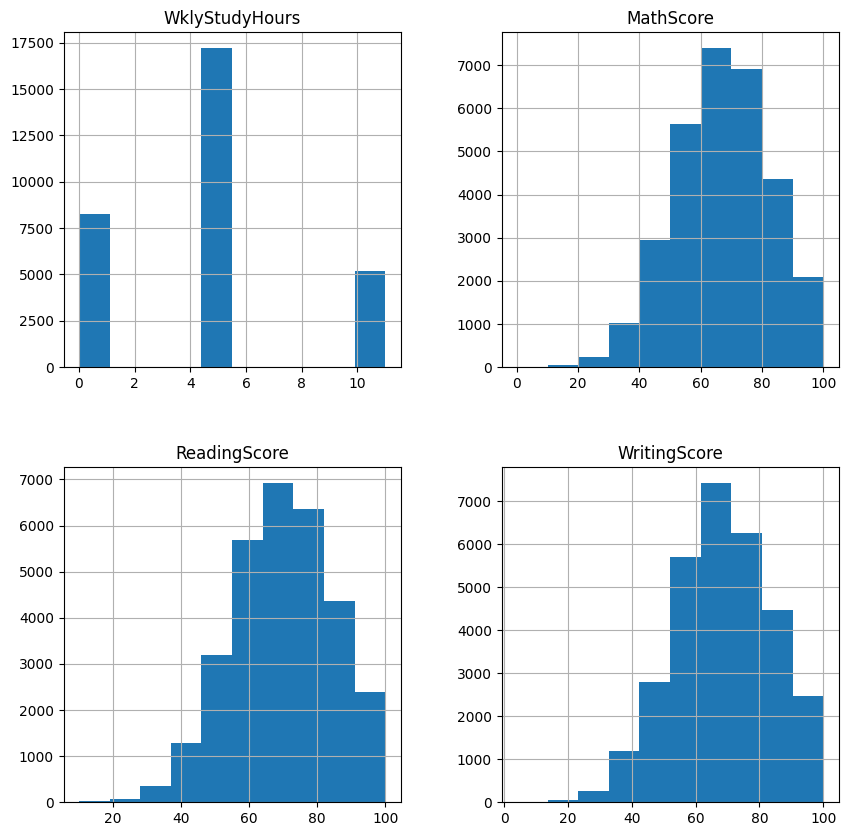

In [202]:
df3.hist(figsize=(10,10))
plt.show()

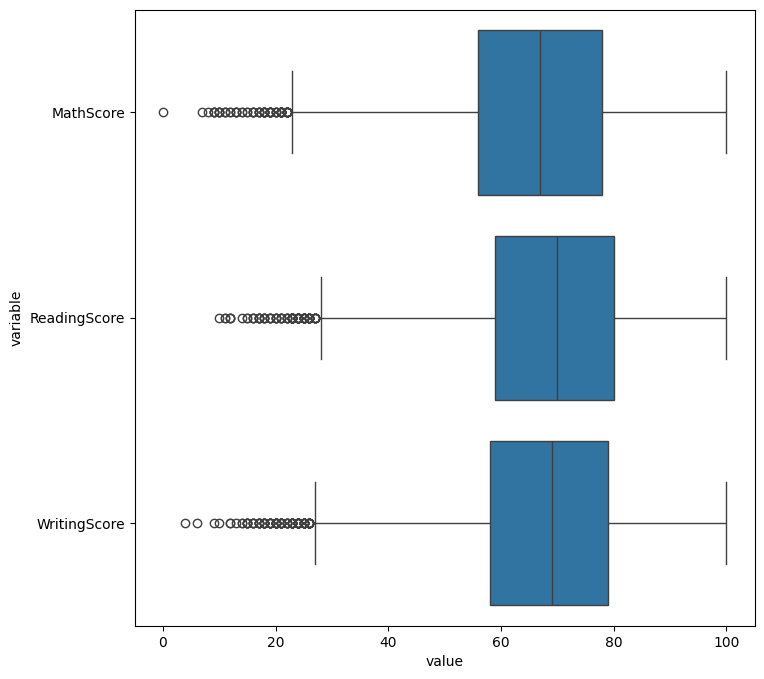

In [203]:
plt.figure(figsize = (8,8))

Scores = df2[['MathScore','ReadingScore','WritingScore']]
sns.boxplot(y = "variable", x = "value", data = pd.melt(Scores))
plt.show()

In [204]:
fig = px.scatter_matrix(df3, dimensions=["MathScore", "ReadingScore", "WritingScore"],
                         color="WklyStudyHours")
fig.show()

In [205]:
fig = px.parallel_coordinates(df3, color="MathScore",
                              dimensions=['MathScore', 'ReadingScore',
                                          'WritingScore', 'WklyStudyHours'],
                              color_continuous_scale=px.colors.diverging.Tealrose,
                              color_continuous_midpoint=2)
fig.show()

# **Reduction**

## **Dimetionality Reduction**

In [206]:
from sklearn.preprocessing import StandardScaler

# Assuming your dataframe is named df
features = df[['MathScore', 'ReadingScore', 'WritingScore']]
x = StandardScaler().fit_transform(features)

In [207]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [208]:
finalDf = pd.concat([principalDf, df[['WklyStudyHours']]], axis = 1)

In [209]:
finalDf.head()

,principal component 1,principal component 2,WklyStudyHours
0,-0.437472,0.049208,< 5
1,-1.655573,-0.911127,5 - 10
2,-2.540200,-0.093192,< 5
3,2.317476,-0.119558,5 - 10
4,-0.935680,0.117918,5 - 10


## **Numerosity Reduction (Sampling)**

In [210]:
df_cleaned = df.dropna()
df_sampled = df_cleaned.sample(frac=0.5, random_state=42)

# Preview the sampled dataset
print(df_sampled.head())

       Gender EthnicGroup          ParentEduc        LunchType   TestPrep  \
21861  female     group B    some high school         standard  completed   
1278     male     group E        some college         standard  completed   
19134    male     group C  associate's degree         standard       none   
4577   female     group E    some high school  free or reduced       none   
29547    male     group B         high school  free or reduced  completed   

      ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings  \
21861             married     regularly           no           3   
1278              married     sometimes          yes           2   
19134             married     sometimes          yes           4   
4577               single     regularly          yes           0   
29547             married         never           no           2   

      TransportMeans WklyStudyHours  MathScore  ReadingScore  WritingScore  
21861        private            < 5         70     

# **Regression**

In [211]:
df2

,TestPrep,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,none,school bus,0,71,71,74
1,none,school bus,5,69,90,88
2,none,school bus,0,87,93,91
3,none,school bus,5,45,56,42
4,none,school bus,5,76,78,75
...,...,...,...,...,...,...
30636,none,school bus,5,59,61,65
30637,none,private,5,58,53,51
30638,completed,private,5,61,70,67
30639,completed,school bus,5,82,90,93


In [212]:
binary_categorical_columns = ['TransportMeans','TestPrep']
non_binary_categorical_columns =['WklyStudyHours']
nonCategorical_columns = ['MathScore','ReadingScore','WritingScore']

In [213]:
# Apply one-hot encoder to each column with non binary categorical data
transport_dummie = pd.get_dummies(df2['TransportMeans'], prefix = 'TransportMenas')
prep_dummie = pd.get_dummies(df2['TestPrep'], prefix = 'TestPrep')

# Remove categorical columns (will replace with one-hot encoding)
num_data = df2.drop(binary_categorical_columns, axis=1)

# Add one-hot encoded columns to numerical features
OH_data = pd.concat([num_data, transport_dummie,prep_dummie], axis=1)


# Ensure all columns have string type
OH_data.columns = OH_data.columns.astype(str)

OH_data.head()


,WklyStudyHours,MathScore,ReadingScore,WritingScore,TransportMenas_private,TransportMenas_school bus,TestPrep_completed,TestPrep_none
0,0,71,71,74,False,True,False,True
1,5,69,90,88,False,True,False,True
2,0,87,93,91,False,True,False,True
3,5,45,56,42,False,True,False,True
4,5,76,78,75,False,True,False,True


In [214]:
!pip install scikit-learn==1.2.2

### **MathScore**

In [215]:
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [216]:
# Select the features and target variable for regression
X = OH_data[['WklyStudyHours', 'TransportMenas_private', 'TransportMenas_school bus', 'TestPrep_completed', 'TestPrep_none']]
y = OH_data['MathScore']  # Example: Predicting Math Score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [217]:
# Create a Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

LinearRegression()

In [218]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [219]:
y_pred

array([67.52246094, 69.68261719, 63.44042969, ..., 63.12988281,
       67.51074219, 65.29003906])

### **ReadingScore**

In [220]:
# Select the features and target variable for regression
X = OH_data[['WklyStudyHours', 'TransportMenas_private', 'TransportMenas_school bus', 'TestPrep_completed', 'TestPrep_none']]
y = OH_data['ReadingScore']  # Example: Predicting Math Score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [221]:
# Create a Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

LinearRegression()

In [222]:
# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred

array([72.96875  , 73.671875 , 66.171875 , ..., 66.4609375, 68.359375 ,
       67.171875 ])

In [223]:
# Example new data for prediction
new_data = pd.DataFrame({
    'WklyStudyHours': [5],
    'TransportMenas_private': [0],
    'TransportMenas_school bus': [1],
    'TestPrep_completed': [1],
    'TestPrep_none': [0]
})

# Make prediction using the trained model
predicted_math_score = model.predict(new_data)

print(f"Predicted Reading Score: {predicted_math_score[0]}")

Predicted Reading Score: 73.671875


In [224]:
from sklearn.metrics import mean_absolute_error

val_predictions = model.predict(X_test)
print(mean_absolute_error(y_test, val_predictions))

val_predictions

import joblib

joblib.dump(model, 'Score.pkl')

11.548286068281937


['Score.pkl']

# **Clustering**

In [225]:
df4  = df[['TestPrep', 'TransportMeans','WklyStudyHours','MathScore','ReadingScore','WritingScore' ]]
df4

,TestPrep,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,none,school bus,< 5,71,71,74
1,none,school bus,5 - 10,69,90,88
2,none,school bus,< 5,87,93,91
3,none,school bus,5 - 10,45,56,42
4,none,school bus,5 - 10,76,78,75
...,...,...,...,...,...,...
30636,none,school bus,5 - 10,59,61,65
30637,none,private,5 - 10,58,53,51
30638,completed,private,5 - 10,61,70,67
30639,completed,school bus,5 - 10,82,90,93


In [226]:
categorical_columns = ['TransportMeans','TestPrep','WklyStudyHours']
nonCategorical_columns = ['MathScore','ReadingScore','WritingScore']

In [227]:
# Apply one-hot encoder to each column with non binary categorical data
transport_dummie = pd.get_dummies(df4['TransportMeans'], prefix = 'TransportMenas')
prep_dummie = pd.get_dummies(df4['TestPrep'], prefix = 'TestPrep')
weaklytudy_dummie = pd.get_dummies(df4['WklyStudyHours'], prefix = 'WklyStudyHours')

# Remove categorical columns (will replace with one-hot encoding)

num_data = df4.drop(categorical_columns, axis=1)



# Add one-hot encoded columns to numerical features
OH_data = pd.concat([num_data, transport_dummie,prep_dummie,weaklytudy_dummie], axis=1)


# Ensure all columns have string type
OH_data.columns = OH_data.columns.astype(str)

OH_data.head()

,MathScore,ReadingScore,WritingScore,TransportMenas_private,TransportMenas_school bus,TestPrep_completed,TestPrep_none,WklyStudyHours_5 - 10,WklyStudyHours_< 5,WklyStudyHours_> 10
0,71,71,74,False,True,False,True,False,True,False
1,69,90,88,False,True,False,True,True,False,False
2,87,93,91,False,True,False,True,False,True,False
3,45,56,42,False,True,False,True,True,False,False
4,76,78,75,False,True,False,True,True,False,False


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



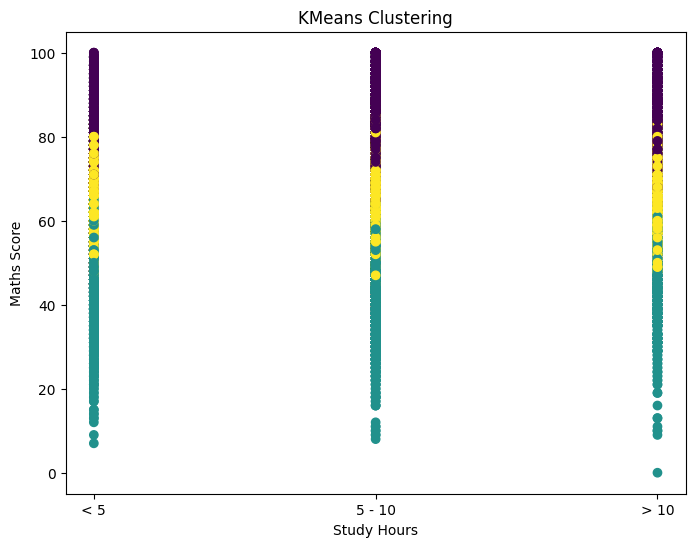

In [228]:
# prompt: do the clustering

import matplotlib.pyplot as plt
# Choose the number of clusters (you can experiment with different values)
n_clusters = 3

# Create a KMeans object
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# Fit the model to the data
kmeans.fit(OH_data)

# Get the cluster labels for each data point
labels = kmeans.labels_

# Add the cluster labels to the DataFrame
OH_data['Cluster'] = labels

# Visualize the clusters (example with two features)
plt.figure(figsize=(8, 6))
plt.scatter(df4['WklyStudyHours'], OH_data['MathScore'], c=OH_data['Cluster'], cmap='viridis')
plt.xlabel('Study Hours')
plt.ylabel('Maths Score')
plt.title('KMeans Clustering')
plt.show()


In [229]:
features = df3[['MathScore', 'ReadingScore', 'WritingScore']]
kmeans = KMeans(n_clusters=3)  # Example: 3 clusters
kmeans.fit(features)
labels = kmeans.labels_
df3['Cluster'] = labels
df3.groupby('Cluster').mean()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



,WklyStudyHours,MathScore,ReadingScore,WritingScore
Cluster,,,,
0,4.945471,82.320979,85.416734,85.132311
1,4.620400,65.306078,68.029753,67.050513
2,4.412617,47.965101,50.589530,48.775436


# **Transformation**

## **Normalizaion**

In [230]:
df5 = df2.head()

In [231]:

# Select numerical columns
numerical_columns = ['MathScore', 'ReadingScore', 'WritingScore']

# Apply Min-Max Normalization (scaling data to range [0, 1])
scaler = MinMaxScaler()
df5[numerical_columns] = scaler.fit_transform(df5[numerical_columns])

# Preview the normalized data
print(df5[numerical_columns].head())

   MathScore  ReadingScore  WritingScore
0   0.619048      0.405405      0.653061
1   0.571429      0.918919      0.938776
2   1.000000      1.000000      1.000000
3   0.000000      0.000000      0.000000
4   0.738095      0.594595      0.673469


## **Z-Score Standarlization**

In [232]:


# Apply Z-score Standardization
scaler = StandardScaler()
df_cleaned[numerical_columns] = scaler.fit_transform(df_cleaned[numerical_columns])

# Preview the standardized data
print(df_cleaned[numerical_columns].head())


   MathScore  ReadingScore  WritingScore
0   0.289141      0.109933      0.361412
1   0.158944      1.397308      1.267955
2   1.330715      1.600578      1.462215
3  -1.403417     -0.906416     -1.710688
4   0.614633      0.584229      0.426165


## **Feature Selection and Feature Engineering**

In [233]:
# Create a new feature: Total Score (sum of Math, Reading, and Writing scores)
df_cleaned['TotalScore'] = df_cleaned['MathScore'] + df_cleaned['ReadingScore'] + df_cleaned['WritingScore']

# Preview the new feature
print(df_cleaned[['MathScore', 'ReadingScore', 'WritingScore', 'TotalScore']].head())

   MathScore  ReadingScore  WritingScore  TotalScore
0   0.289141      0.109933      0.361412    0.760485
1   0.158944      1.397308      1.267955    2.824207
2   1.330715      1.600578      1.462215    4.393507
3  -1.403417     -0.906416     -1.710688   -4.020521
4   0.614633      0.584229      0.426165    1.625026


# **Data Mining**

## **Data Mining**

In [234]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor # Changed to DecisionTreeRegressor
from sklearn.metrics import accuracy_score

# Define target and features (use 'TotalScore_Discretized' as the target for classification)
X = df_cleaned[['MathScore', 'ReadingScore', 'WritingScore']]
y = df_cleaned['TotalScore']  # Remove .dropna()

# Drop rows with missing values from both X and y
X = X[~y.isna()]
y = y[~y.isna()]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Decision Tree Regressor
clf = DecisionTreeRegressor(random_state=42) # Changed to DecisionTreeRegressor
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Evaluate the model performance (use a suitable metric for regression)
# For example, Mean Squared Error (MSE)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error of Decision Tree Regressor: {mse:.2f}")

Mean Squared Error of Decision Tree Regressor: 0.01


## **Evaluation**

In [235]:
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

# Calculate R-squared (R2)
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 0.01
R-squared: 1.00


## **Iterate**

In [236]:
# Experiment with a different 'max_depth' parameter
clf_tuned = DecisionTreeRegressor(max_depth=5, random_state=42) # Changed to DecisionTreeRegressor
clf_tuned.fit(X_train, y_train)

# Evaluate the tuned model
y_pred_tuned = clf_tuned.predict(X_test)

# Use a suitable metric for regression, such as mean_squared_error
mse_tuned = mean_squared_error(y_test, y_pred_tuned)
print(f"Tuned Model MSE: {mse_tuned:.2f}")

Tuned Model MSE: 0.22


# **Evaluation & Interpretation**

Mean Squared Error: 0.01
R-squared: 1.00


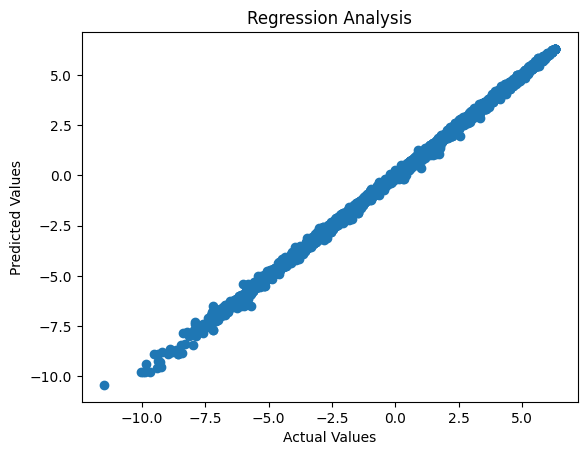

In [237]:
import matplotlib.pyplot as plt
#from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay #Removed unused imports
from sklearn.metrics import mean_squared_error, r2_score #Added relevant imports for regression

# Compute suitable metrics for regression
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print regression metrics
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

# Optionally, create visualizations for regression analysis (e.g., scatter plot of predicted vs. actual)
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Regression Analysis")
plt.show()



Unique values in y_train_binary: {1}
Shape of probs array: (9193, 1)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1020: UndefinedMetricWarning:

No negative samples in y_true, false positive value should be meaningless



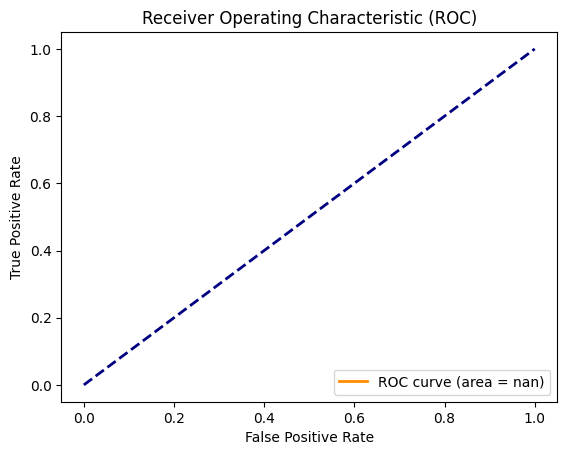

In [238]:
from sklearn.metrics import roc_curve, auc
from sklearn.tree import DecisionTreeClassifier # Import DecisionTreeClassifier

# Assuming 'Low' needs to be mapped to 0 and other values to 1
y_test_binary = [0 if y == 'Low' else 1 for y in y_test]
# Create y_train_binary by mapping 'Low' to 0 and other values to 1 in y_train
y_train_binary = [0 if y == 'Low' else 1 for y in y_train] # Create y_train_binary

# Use DecisionTreeClassifier instead of DecisionTreeRegressor
clf_classifier = DecisionTreeClassifier(random_state=42)
clf_classifier.fit(X_train, y_train_binary) # Fit with binary target

# Check the unique values in your training target variable
print(f"Unique values in y_train_binary: {set(y_train_binary)}")

# Use predict_proba for probabilities with DecisionTreeClassifier
# Check the shape of the probabilities array
probs = clf_classifier.predict_proba(X_test)
print(f"Shape of probs array: {probs.shape}")

# Access the probabilities for the first class (index 0) instead of the second (index 1)
probs = probs[:, 0]  # Get probabilities for class 0

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test_binary, probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

## **Cross-validation**

In [239]:
from sklearn.model_selection import cross_val_score # import the missing function
# Assuming 'X' has more samples, remove extra samples from 'X' to match 'y'
X = X[:len(y)]

# Perform cross-validation
cv_scores = cross_val_score(clf, X, y, cv=5)

# Display the average cross-validation score
print(f"Average 5-Fold Cross-Validation Accuracy: {cv_scores.mean():.2f}")

Average 5-Fold Cross-Validation Accuracy: 1.00


## **Hyperparameter Tuning**

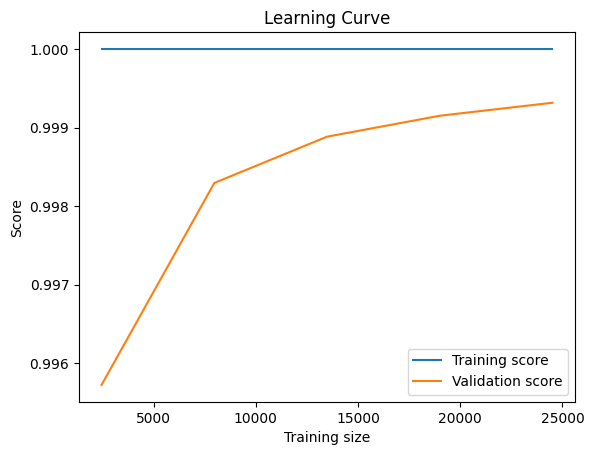

In [240]:
from sklearn.model_selection import learning_curve

# Plot learning curves
train_sizes, train_scores, test_scores = learning_curve(clf, X, y, cv=5)

# Calculate mean and std of train and test scores
train_scores_mean = train_scores.mean(axis=1)
test_scores_mean = test_scores.mean(axis=1)

plt.plot(train_sizes, train_scores_mean, label='Training score')
plt.plot(train_sizes, test_scores_mean, label='Validation score')
plt.xlabel('Training size')
plt.ylabel('Score')
plt.legend()
plt.title('Learning Curve')
plt.show()

# **Deploy Model**

In [241]:
import joblib

# Save the model to a file
joblib.dump(clf, 'final_model.joblib')

['final_model.joblib']